In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Load and clean dataset
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.columns = df.columns.str.strip()
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", errors='coerce')

In [47]:
# Filter data between 2019 and 2020
df_filtered = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2020-12-31')]

In [48]:
# Split into Pre-COVID (before March 2020) and During COVID (March 2020 onwards)
pre_covid = df[df['Date'] < '2020-03-01']
covid = df[df['Date'] >= '2020-03-01']

In [49]:
# Calculate average unemployment rate for each region
pre_avg = pre_covid.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
covid_avg = covid.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

In [50]:
# RENAMING COLUMNS
pre_avg.rename(columns={'Estimated Unemployment Rate (%)': 'Before-COVID Rate'}, inplace=True)
covid_avg.rename(columns={'Estimated Unemployment Rate (%)': 'COVID Rate'}, inplace=True)

In [51]:
# Merge for comparison
comparison = pd.merge(pre_avg, covid_avg, on='Region')

<Figure size 1400x600 with 0 Axes>

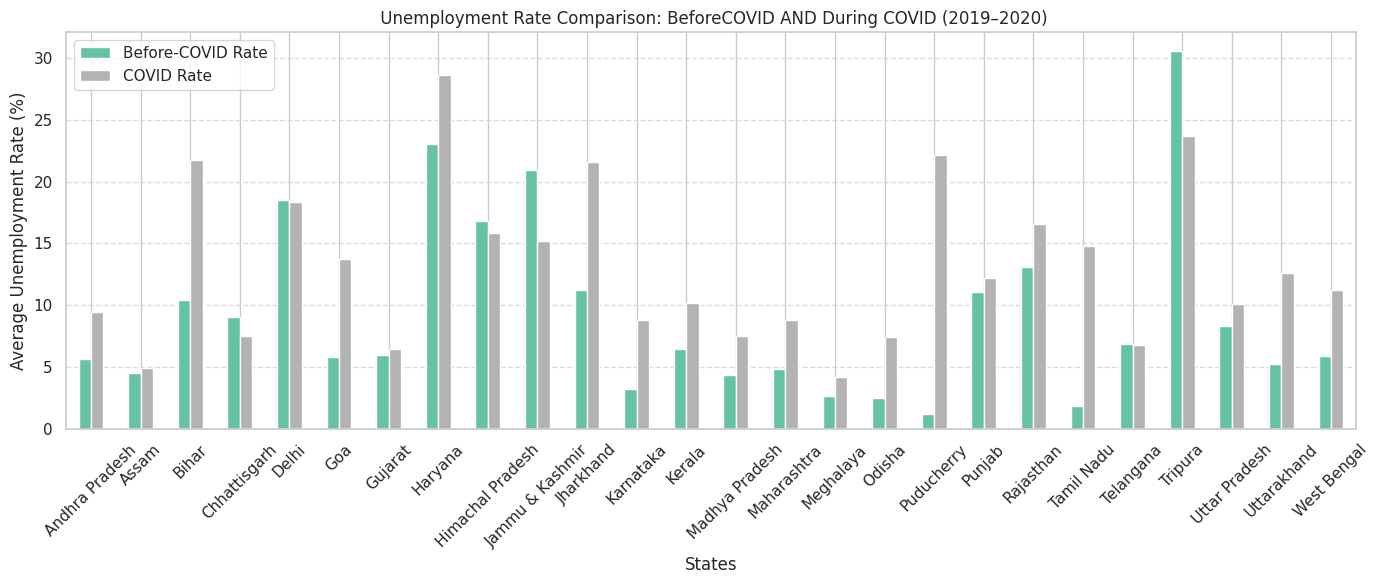

In [52]:
#HISTOGRAM
plt.figure(figsize=(14, 6))
comparison.set_index('Region').plot(kind='bar', figsize=(14, 6), colormap='Set2')
plt.title(" Unemployment Rate Comparison: BeforeCOVID AND During COVID (2019–2020)")
plt.xlabel("States")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()